In [1]:
# Design of a 120 ns selective pulse that performs the transfer |0> → |1> 
# when the qubit is detuned by -2.5 MHz, and |0> → |0> when detuned by +2.5 MHz.
# The qubits are modeled as ideal two-level systems (NLevels = 2). 
# Selectivity is achieved by simultaneously optimizing over two parameter sets 
# corresponding to different detunings associated to different target states. 
# The pulse amplitude is constrained such that 
#                 2π·ν_Ref·(ux²+uy²)¹⸍² < 8 MHz. 

# The resulting sequence resembles a Ramsey experiment, with the pulse 
# switched off between t = 32 ns and t = 88 ns. 
# Note: This solution was shown to be time-optimal (Phys. Rev. A 98, 043421). 
# Other parameter choices (detuning, MaxAmplitude, Nt or NLevels) can lead 
# to different solutions.

# Estimated script runtime: ~5 minutes.

# AUTHOR:
#     Leo Van Damme / Technical University of Munich, 2025

In [2]:
from Module.parameters import ProblemParameters
from Module.grape import *
import matplotlib.pyplot as plt
from Module.pulse_utils import *
from Module.phys_utils import StateProbability, EigState, GateFidelityMap

In [3]:
# Problem parameters
p = ProblemParameters(
        QubitFreq = 5e9 + np.array([-2.5e6, 2.5e6]),  # QubitFreq in Hz
        CarrFreq = 5e9,        # Carrier frequency in Hz
        NLevels = 2,           # Number of energy levels (ideal qubits)
        dt = 1e-9,             # Timestep in s.
        Nt = 120,              # Number of time steps
        CompSpace = [0,1],     # Indices of the computational states
        Psi0 = [1,0, 1,0],     # Initial states: [|0>, |0>]
        Target = [1,0, 0,1]    # Target states:  [|1>, |0>]    
        )

In [4]:
# Initial guess
ux0 = np.ones(p.Nt)
uy0 = np.zeros(p.Nt)

In [5]:
# Optimization options
gopt=Grape(
        Maxiter=2000,        # Maximum number of iterations
        MaxAmplitude=8e6,    # Maximum amplitude allowed in Hz
        nGrad=3              # Improve gradient accuracy
        )

In [6]:
# Optimize the pulse
ux, uy, J = gopt.Optimize(p,ux0, uy0)

Compiling cost function... Done.
########### OPTIMIZATION RESULTS ###########
Cost before optimization: 0.500000000000
Cost after optimization: 0.000520007565
Number of Iterations: 2000
Message: The maximum number of iterations has been reached


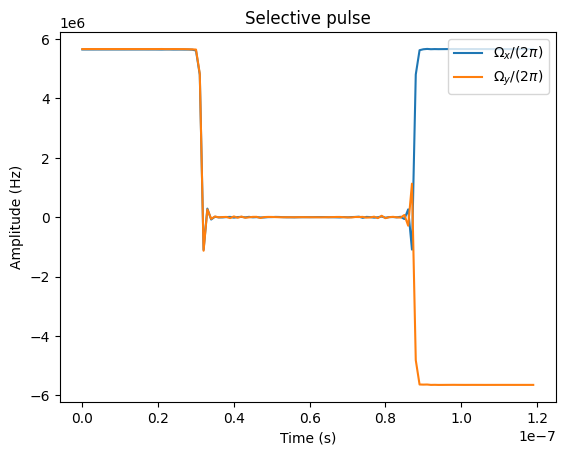

In [7]:
# Display In-phase and quadrature component in Hz
plt.figure()
plt.plot(p.tc,p.nuRef*ux,p.tc,p.nuRef*uy)

# Labels and legend
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (Hz)')
plt.legend([r'$\Omega_x/(2\pi)$', r'$\Omega_y/(2\pi)$'],
            loc='upper right')
plt.title(f"Selective pulse")

plt.show()


In [8]:
# Compute transition probabilities
psi_init = EigState(StateIndice='|0>', NLevels=p.NLevels)
psi_meas = EigState(StateIndice='|1>', NLevels=p.NLevels)
P01 = StateProbability(p,ux,uy,InitState=psi_init, MeasState=psi_meas)

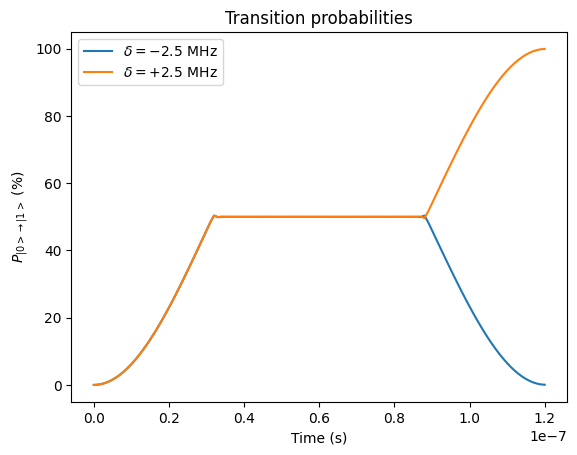

In [9]:
# Display Transition probabilities
plt.figure()
plt.plot(p.t,P01*100)
plt.xlabel('Time (s)')
plt.ylabel(r'$P_{|0>\rightarrow |1>}$ (%)')
plt.legend([r'$\delta = -2.5$ MHz', r'$\delta = +2.5$ MHz'])
plt.title("Transition probabilities")
plt.show()
